In [4]:
import cv2

img = cv2.imread('sunflower.jpg', 0)

In [6]:
if img is not None:
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load image")

In [8]:
rows, cols = img.shape

In [9]:
rows

427

In [10]:
cols

640

In [13]:
for i in range(rows):
    for j in range(cols):
        print(img[i,j], end = " ")
    print()

110 110 110 110 110 111 111 111 111 110 110 110 110 110 110 110 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 111 112 110 111 111 112 112 112 112 112 111 111 111 111 111 111 112 112 111 112 112 112 112 112 112 112 112 112 112 112 112 113 113 113 113 113 113 113 113 113 113 113 113 113 113 113 113 114 114 114 113 113 113 113 113 113 113 113 114 114 113 113 113 114 114 115 114 114 114 114 114 114 115 115 115 115 115 115 115 115 116 116 115 114 114 116 116 114 115 116 114 115 115 115 116 115 115 115 116 116 116 116 116 115 115 115 116 116 116 116 116 116 117 117 116 116 116 116 116 116 116 116 116 116 116 115 115 116 116 116 116 116 116 116 116 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 114 114 114 114 116 115 114 113 113 114 113 113 113 113 113 113 113 113 113 113 113 113 113 113 113 113 113 114 113 113 113 113 114 114 114 114 114 114 114 114 114 114 114 114 114 114 114 114 115 115 115 115 116 115 115 115 115 115 115 115 116 117 

In [14]:
for i in range(rows):
    for j in range(cols):
        img[i,j] = 255 - img[i,j]

In [17]:
if img is not None:
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load image")

Text(0.5, 1.0, 'Negation of Image')

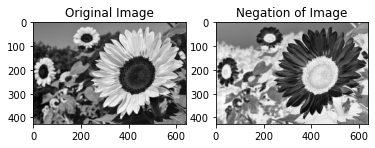

In [27]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('sunflower.jpg')

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.subplot(1,2,1)
plt.imshow(gray_image, cmap = 'gray')
plt.title("Original Image")

rows, cols = gray_image.shape

for i in range(rows):
    for j in range(cols):
        gray_image[i,j] = 255 - gray_image[i,j]
        

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap = 'gray')
plt.title("Negation of Image")

In [51]:
import matplotlib.pyplot as plt
import cv2
import os
import random
    
def display(img):
    if img is not None:
        cv2.imshow('Image', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Failed to load image")
        
def find_negation(img, x):
    rows, cols = img.shape

    for i in range(rows):
        for j in range(cols):
            img[i,j] = x - img[i,j]
    display(img)
            
image_path = input("Enter a image file :: ")
if os.path.exists(image_path):
    img = cv2.imread(image_path, 0)
    display(img)
    x = int(input("Enter a number between 0 and 255 :: "))
    if x < 0 or x > 255:
        print("Please enter a value between 0 and 255")
    else:
        find_negation(img , x)
else:
    print("Image does not exist")

Enter a image file :: sunflower.jpg
Enter a number between 0 and 255 :: 250


Enter the path to the file: fruit.txt


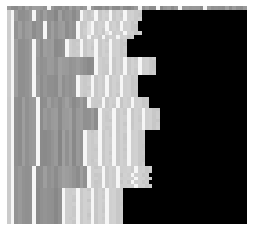

In [52]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def negate_image(file_path):
    try:
        # For text files
        if file_path.endswith('.txt'):
            with open(file_path, 'r') as file:
                # Read the ASCII art from the text file
                ascii_art = file.read()

            # Convert ASCII art to image representation
            # This is a simplified example assuming each character represents a pixel
            # You may need to adjust this depending on the actual format of your text file
            image_data = []
            for line in ascii_art.split('\n'):
                row = []
                for char in line:
                    # Assuming char represents brightness, negate it
                    negated_brightness = 255 - ord(char)
                    row.append((negated_brightness, negated_brightness, negated_brightness))
                image_data.append(row)

            # Create a PIL Image object from the negated image data
            negated_image = Image.new('RGB', (len(image_data[0]), len(image_data)))
            for y, row in enumerate(image_data):
                for x, pixel in enumerate(row):
                    negated_image.putpixel((x, y), pixel)

        # For image files
        elif file_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Open the image using PIL
            image = Image.open(file_path)

            # Convert image to grayscale and negate it
            negated_image = Image.eval(image, lambda x: 255 - x)

        # For video files
        elif file_path.endswith(('.mp4', '.avi', '.mov')):
            # Open video file using OpenCV
            cap = cv2.VideoCapture(file_path)

            # Read the first frame
            ret, frame = cap.read()

            # Convert frame to grayscale and negate it
            negated_frame = cv2.bitwise_not(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

            # Convert numpy array to PIL Image
            negated_image = Image.fromarray(negated_frame)

            # Release the video capture object
            cap.release()

        else:
            print("Unsupported file type.")
            return

        # Convert PIL Image to NumPy array
        negated_array = np.array(negated_image)

        # Plot the negated image
        plt.imshow(negated_array)
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print("File not found. Please enter a valid file path.")


# Allow the user to input the file path dynamically
file_path = input("Enter the path to the file: ")

negate_image(file_path)

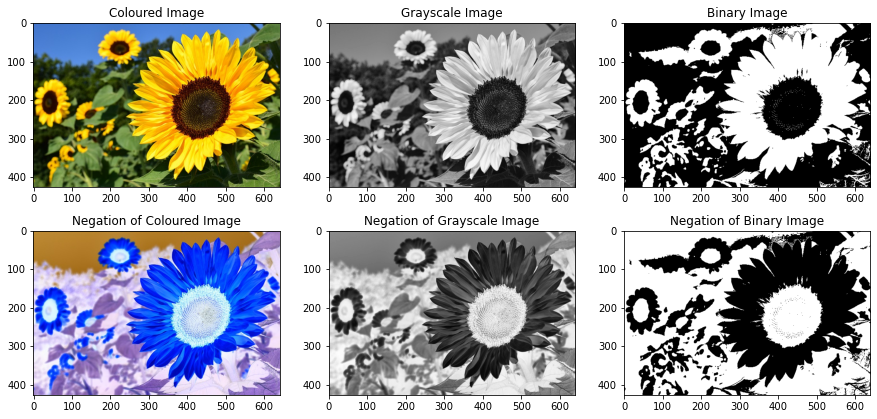

In [61]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('sunflower.jpg')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(15, 7))
plt.subplot(2,3,1)
plt.imshow(rgb_image)
plt.title("Coloured Image")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.subplot(2,3,2)
plt.imshow(gray_image, cmap = 'gray')
plt.title("Grayscale Image")

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(2,3,3)
plt.imshow(binary_image, cmap = 'gray')
plt.title("Binary Image")

b, g, r = cv2.split(rgb_image)
neg_b = 255 - b
neg_g = 255 - g
neg_r = 255 - r

# Merge the negated color channels
negated_image = cv2.merge((neg_b, neg_g, neg_r))

rows, cols = gray_image.shape

for i in range(rows):
    for j in range(cols):
        gray_image[i,j] = 255 - gray_image[i,j]
        
negated_binary_image = cv2.bitwise_not(binary_image)        

plt.subplot(2,3,4)
plt.title("Negation of Coloured Image")
plt.imshow(negated_image)

plt.subplot(2,3,5)
plt.title("Negation of Grayscale Image")
plt.imshow(gray_image, cmap = 'gray')

plt.subplot(2,3,6)
plt.title("Negation of Binary Image")
plt.imshow(negated_binary_image, cmap = 'gray')

In [83]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('sunflower.jpg')

if img is not None:
    cv2.imshow('Original Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load image")

In [94]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

In [95]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

In [96]:
if img is not None:
    cv2.imshow('Binary Image', binary_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load image")

In [97]:
brows, bcols = binary_image.shape   

In [98]:
brows, bcols

(427, 640)

In [99]:
for i in range(brows):
    for j in range(bcols):
        print(binary_image[i,j], end = " ")
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 25

In [100]:
for i in range(brows):
    for j in range(bcols):
        binary_image[i,j] = 1 - binary_image[i,j]

In [101]:
if img is not None:
    cv2.imshow('Negation of binary Image', binary_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load image")